<a href="https://colab.research.google.com/github/muhammadaamir2023/Projects/blob/main/Aerofit_Descriptive_Statistics_%26_Probability_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


##Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
df = pd.read_csv("aerofit_treadmill.txt")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.shape

(180, 9)

In [ ]:
df.keys()

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

### Missing Values and outliers Detection
Handling Missing Values

In [ ]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


### Inference
There are no missing values in the dataframe

In [ ]:
df["Product"].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
df["Age"].value_counts()
df["Age"].head()

,Age
0,18
1,19
2,19
3,19
4,20


In [ ]:
df["Gender"].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
df["Education"].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [ ]:
df["MaritalStatus"].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
df["Usage"].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [ ]:
df["Fitness"].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [ ]:
df["Income"].value_counts()

,count
Income,
45480,14
52302,9
46617,8
54576,8
53439,8
...,...
65220,1
55713,1
68220,1


In [ ]:
df["Miles"].value_counts().head()

,count
Miles,
85,27
95,12
66,10
75,10
47,9


In [ ]:
product_count = df["Product"].value_counts(normalize=True)*100
product_count.round(1)

,proportion
Product,
KP281,44.4
KP481,33.3
KP781,22.2


### Insight:

Among the users, 44.4% prefer using the KP281 treadmill, while 33.3% opt for the KP481 treadmill, and only 22.2% of users favor the KP781 treadmill.

In [ ]:
df["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
df["Age"].nunique()

32

In [ ]:
age_count = df["Age"].value_counts(normalize=True)*100
age_count.round(2)

,proportion
Age,
25,13.89
23,10.00
24,6.67
26,6.67
28,5.00
35,4.44
33,4.44
30,3.89
38,3.89


## Statistical Summary

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [ ]:
df["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

In [ ]:
df["MaritalStatus"].nunique()

2

In [ ]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df["Product"].nunique()

3

In [ ]:
pd.crosstab(index=df['Product'],columns=df['MaritalStatus'],margins=True,margins_name='Total',normalize=True).round(2)

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
Total,0.59,0.41,1.00


In [ ]:
age_count[(age_count.index>=20)&(age_count.index<=30)].sum().round(2)

63.89

### Insight
Nearly 64% of aerofit users belong  to the age group of 20-30

In [ ]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df["Gender"].nunique()

2

In [ ]:
gender_count = df["Gender"].value_counts(normalize = True)*100
gender_count.round(2)

,proportion
Gender,
Male,57.78
Female,42.22


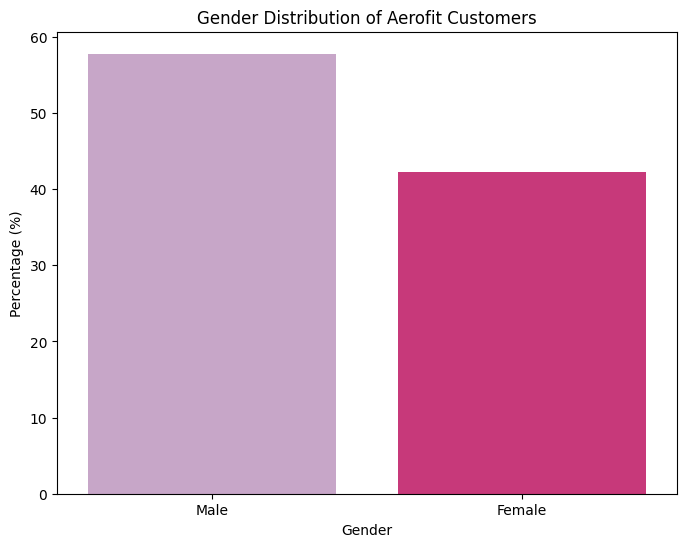

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=gender_count.index, y=gender_count.values, palette='PuRd')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.title('Gender Distribution of Aerofit Customers')
plt.show()

### Insight
Aerofit has 57.78% male customer and 42.22% female customer

In [ ]:
df["Income"].describe().round(2)

,Income
count,180.00
mean,53719.58
std,16506.68
min,29562.00
25%,44058.75
50%,50596.50
75%,58668.00
max,104581.00


### To find outliers in Income column we need to use box plot here. But before using the box plot we need find these 5 points:

1) q3 - upper Quartile

2) q1 - Lower Quartile

3) Median

4)Upper Bound

5)Lower Bound

In [ ]:
q1=np.percentile(df['Income'],25)
q3=np.percentile(df['Income'],75)
print('q1=',q1)
print('q3=',q3)

q1= 44058.75
q3= 58668.0


Analysis:

q1=44058.75

q3= 58668.0

In [ ]:
IQR = q3-q1
IQR

14609.25

Analysis:

IQR= 14609.75

In [ ]:
upper_bound=q3+1.5*IQR
lower_bound=q1-1.5*IQR
print("Upper Bound=",upper_bound)
print('Lower Bound=',lower_bound)
print('Median=',df['Income'].median())

Upper Bound= 80581.875
Lower Bound= 22144.875
Median= 50596.5


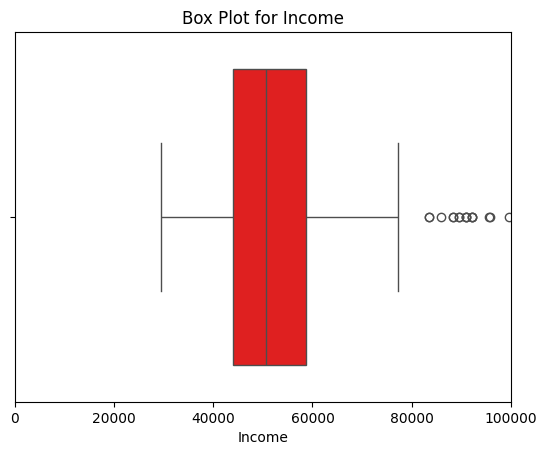

In [ ]:
sns.boxplot(data=df,x='Income',color='red')
plt.title('Box Plot for Income')
plt.xlim(0,100000)
plt.show()

### Insight
- all values > 80581.75 (upper bound) are outliers in the 'Income' column

In [ ]:
(len(df.loc[df['Income']>upper_bound])/len(df))*100

10.555555555555555

Analysis:

10.5 % values in Income column are outliers but we choose not to drop them as these values may required to draw some valuable insights and it may be useful for customer profiling.

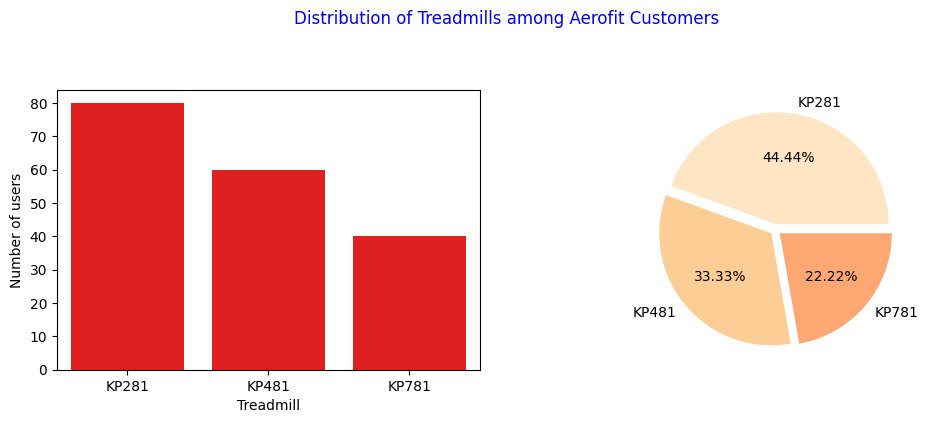

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(data=df,x=df['Product'],color = 'red')
plt.xlabel('Treadmill')
plt.ylabel('Number of users')
plt.subplot(2,2,2)
plt.pie(df['Product'].value_counts(), labels=df['Product'].unique(),explode= (0.05,0.05,0.05),colors=sns.color_palette('OrRd'), autopct='%.2f%%')
plt.suptitle('Distribution of Treadmills among Aerofit Customers',color = "blue")
plt.show()

Insight:

- Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill

- 33.3% of customers favor the KP481 treadmill, drawn by its ideal fit for mid-level runners and its excellent value-for-money offering.

- KP781 treadmill, being more advanced and costlier than the other two options, is chosen by only 22.2% of custom

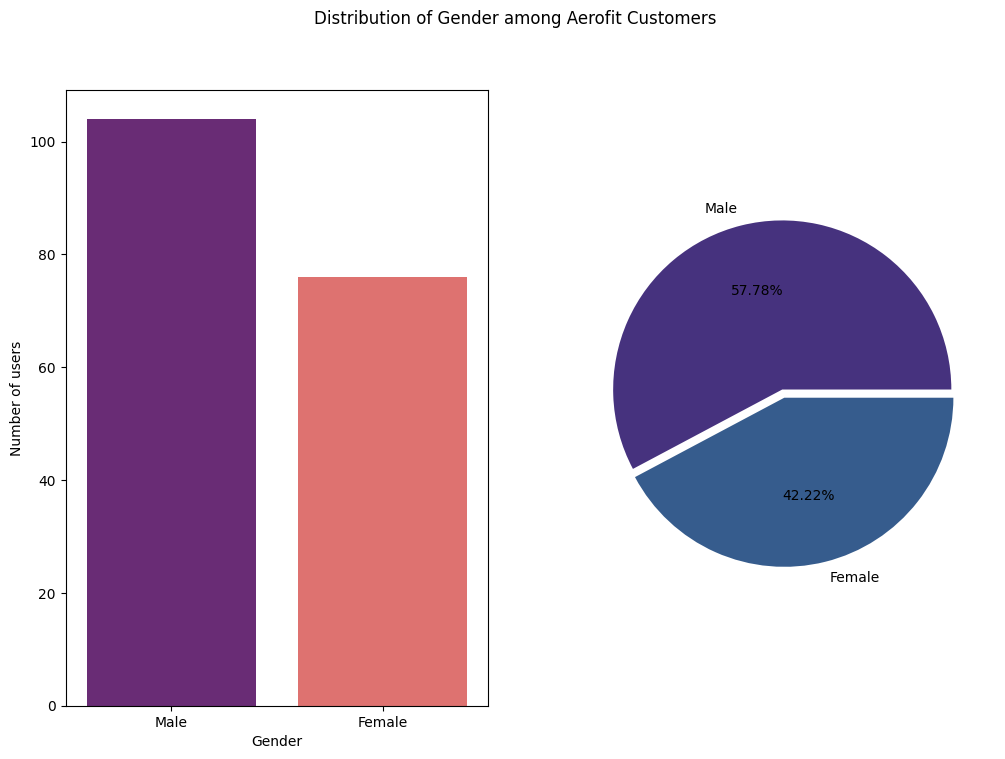

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.countplot(data=df,x=df['Gender'],palette='magma')
plt.xlabel('Gender')
plt.ylabel('Number of users')

plt.subplot(1,2,2)
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(),explode= (0.05,0),colors=sns.color_palette('viridis'), autopct='%.2f%%',)
plt.suptitle('Distribution of Gender among Aerofit Customers')
plt.show()

Insight:

Aerofit has 57.78% male customers and 42.22% female customers.

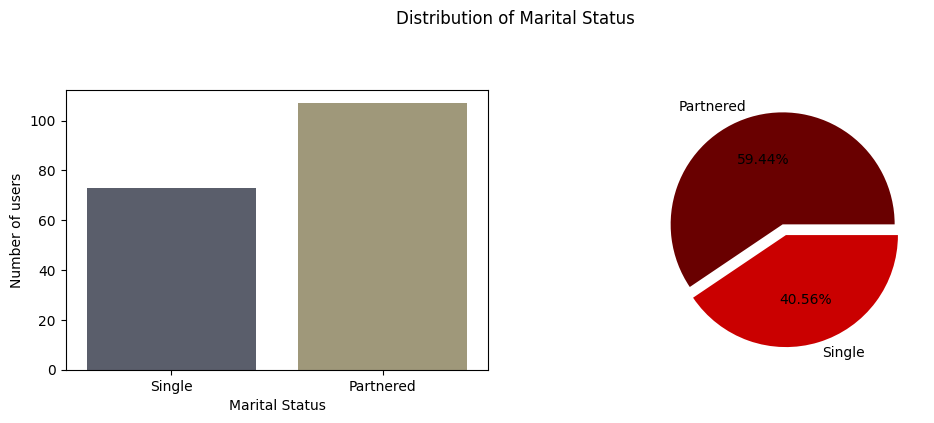

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data=df,x='MaritalStatus',palette='cividis')
plt.xlabel('Marital Status')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['MaritalStatus'].value_counts(), labels=['Partnered','Single'],explode= (0.05,0.05),colors=sns.color_palette('hot'), autopct='%.2f%%',)

plt.suptitle('Distribution of Marital Status')
plt.show()

Insight:

59.4% of Aerofit customers are married, while remaining 40.56% are single.

In [ ]:
pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True,margins_name='Total',normalize=True).round(2)

Gender,Female,Male,Total
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
Total,0.42,0.58,1.00


###Marginal Probablities

- P(KP281)= 0.44

- P(KP481)= 0.33

- P(kP781)= 0.22

- P(Male)= 0.58

- P(Female)= 0.42


###Conditional Probablities

- P(KP281|Male) = 0.22

- P(KP281|Female) = 0.22

- P(KP481|Male) = 0.17

- P(KP481|Female) = 0.16

- P(KP781|Male) = 0.18

- P(KP781|Female)= 0.04

## Adding New columns - Income group and Age group

###Age group

To gain valuable insights, it is essential to categorize the age column into distinct groups, such as young, middle-aged, and old. It will allow us to understand the customer purchase behaviour.

In [ ]:
df['Age'].describe().T.round(2)

,Age
count,180.00
mean,28.79
std,6.94
min,18.00
25%,24.00
50%,26.00
75%,33.00
max,50.00


In [ ]:
df['Age group']=pd.cut(df['Age'],bins=[17,29,39,50],labels=['Young','Middle-aged','Old'])

### Age-groups:

- 18-29:Young

- 30-39:Middle-aged

- 40-50: Old

In [ ]:
df['Age group'].value_counts()

,count
Age group,
Young,113
Middle-aged,50
Old,17


###  Income group

Similary we will catgroize 'Income' values into 3 groups 'Low','Medium' ,'High' . It will not only allow us to gain valuable insight but also help in customer profiling.

In [ ]:
df['Income'].describe().T.round(2)

,Income
count,180.00
mean,53719.58
std,16506.68
min,29562.00
25%,44058.75
50%,50596.50
75%,58668.00
max,104581.00


In [ ]:
df['Income group']=pd.cut(df['Income'],bins=[29000,50000,75000,105000],labels=['Low','Medium','High'])

### Income groups:

- 29000-50000: Low
- 51000-75000: Medium
- 76000-105000: High

In [ ]:
df['Income group'].isnull().sum()

0

In [ ]:
df['Income group'].value_counts()

,count
Income group,
Low,83
Medium,76
High,21


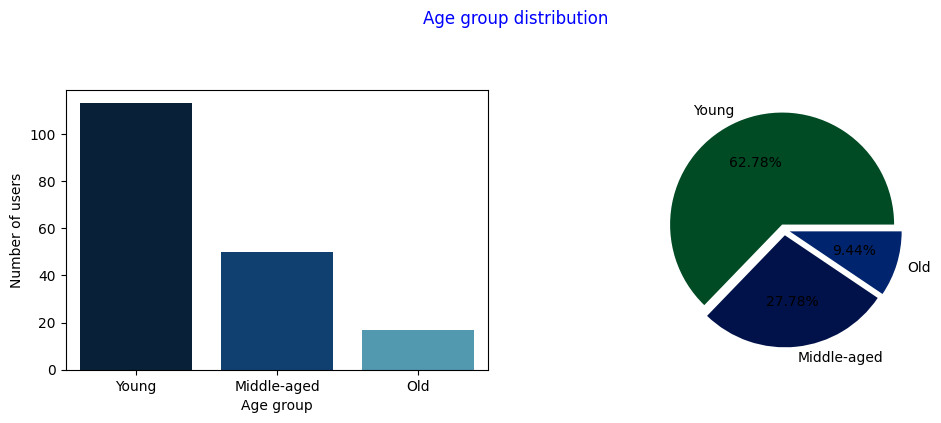

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data=df,x='Age group',palette='ocean')
plt.xlabel('Age group')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['Age group'].value_counts(), labels=df['Age group'].unique(),explode= (0.05,0.05,0.05),colors=sns.color_palette('ocean'), autopct='%.2f%%',)

plt.suptitle('Age group distribution',color= "blue")
plt.show()

### Insight:

- Most of the Aerofit customer falls under young age-group (18-29).
- 27.78 % of middle-aged(30-39) users prefer to use the Aerofit Treadmills.
- 9.4% of users in the old (40-50) age group prefer purchasing

### Recommendations:

- Offer personalized assistance to help customers aged 40-50 select the ideal treadmill model, providing them with the tools to maintain an active and healthy lifestyle. With Aerofit's expert guidance, customers can feel confident and motivated to make the most of their treadmills effectively.

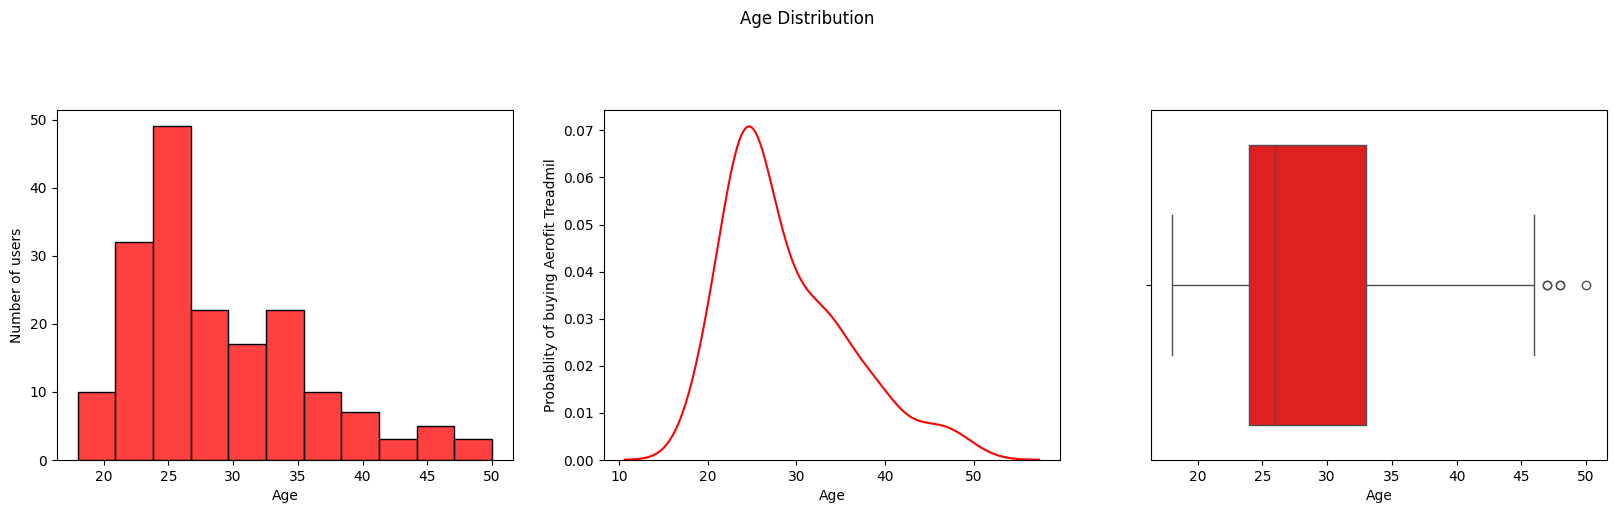

In [ ]:
plt.figure(figsize=(20,10))

# Histogram
plt.subplot(2,3,1)
sns.histplot(data=df,x='Age',color = "red")
plt.xlabel('Age')
plt.ylabel('Number of users')

# KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data=df,x='Age',color = "red")
plt.xlabel('Age')
plt.ylabel('Probablity of buying Aerofit Treadmil')

#Boxplot
plt.subplot(2,3,3)
sns.boxplot(data=df,x='Age',color = "red")
plt.xlabel('Age')

plt.suptitle('Age Distribution')
plt.show()

### Insight:

The majority of Aerofit customers belong to the age group of 18-30, and there is a high probability of them purchasing Aerofit treadmills.
There are very few users in the age group of 40-50, and the probability of them buying Aerofit treadmills is significantly low.

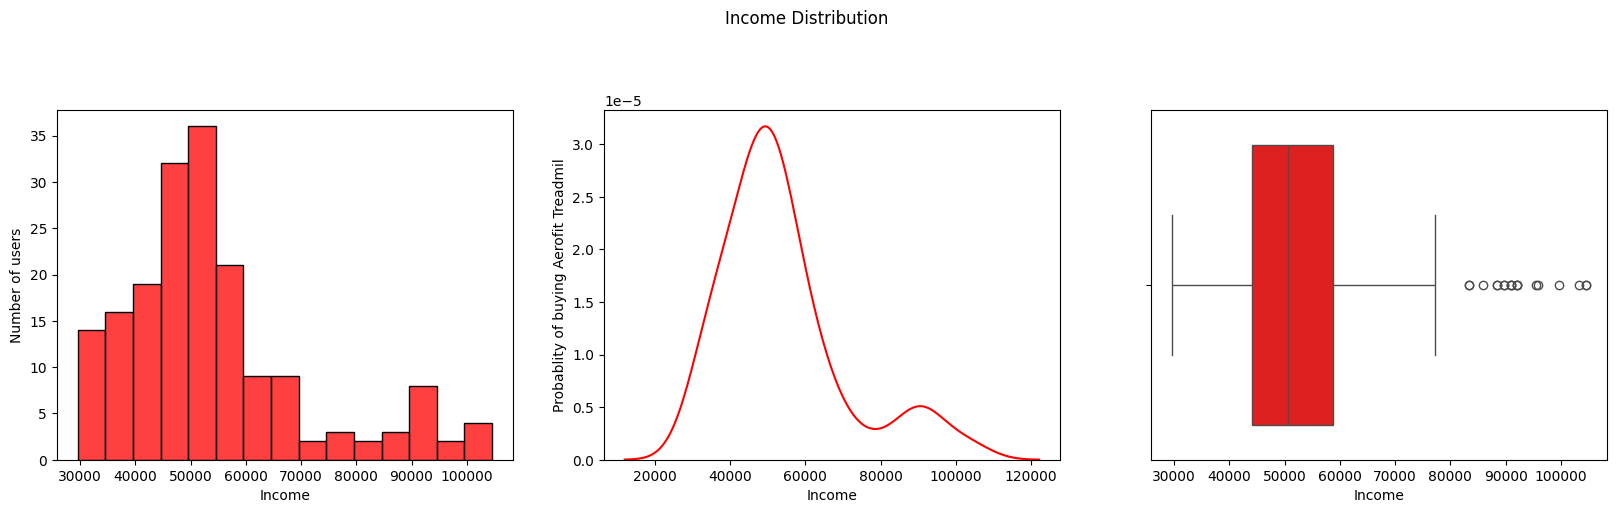

In [ ]:
plt.figure(figsize=(20,10))

# Histogram
plt.subplot(2,3,1)
sns.histplot(data=df,x='Income',color = "red")
plt.xlabel('Income')
plt.ylabel('Number of users')

# KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data=df,x='Income',color = "red")
plt.xlabel('Income')
plt.ylabel('Probablity of buying Aerofit Treadmil')

#Boxplot
plt.subplot(2,3,3)
sns.boxplot(data=df,x='Income',color = "red")

plt.suptitle('Income Distribution')
plt.show()

### Insight:

- The majority of Aerofit customers fall within the income range of 40000-60000, and there is a high probability of them purchasing Aerofit treadmills.

- Surprisingly, customers with an income greater than 80000 have a significantly lower likelihood of buying Aerofit treadmills.

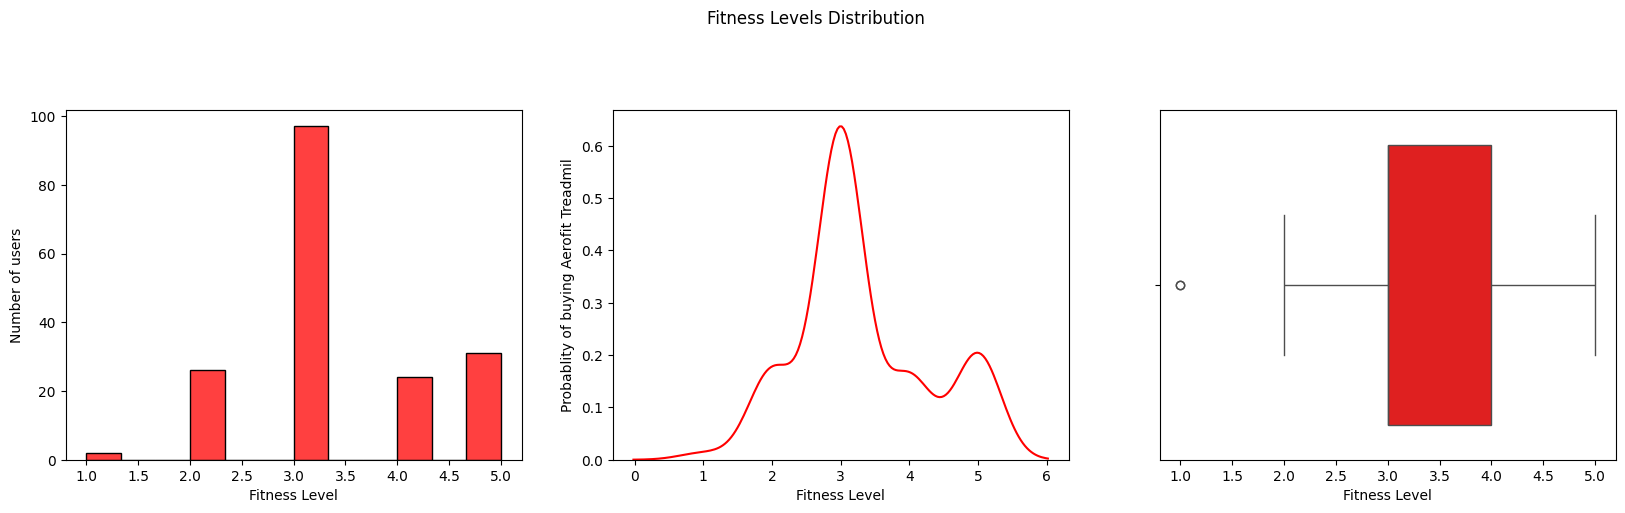

In [ ]:
plt.figure(figsize=(20,10))

# Histogram
plt.subplot(2,3,1)
sns.histplot(data=df,x='Fitness',color = "red")
plt.xlabel('Fitness Level')
plt.ylabel('Number of users')

# KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data=df,x='Fitness',color= "red")
plt.xlabel('Fitness Level')
plt.ylabel('Probablity of buying Aerofit Treadmil')

#Boxplot
plt.subplot(2,3,3)
sns.boxplot(data=df,x='Fitness',color= "red")
plt.xlabel('Fitness Level')
plt.suptitle('Fitness Levels Distribution')
plt.show()












###Insight:

- The majority of Aerofit customers possess fitness level 3, which aligns with a high likelihood of them purchasing treadmills.

### Distribution of Age group for each Treadmill¶

In [ ]:
sns.countplot(data=df,x='Age group',hue='Product',palette='viridis')
plt.title(' Distribution of Age group across each Treadmill', fontsize=14)
plt.xlabel('Age group')
plt.ylabel('Number of users')
plt.show()
print()
print('---- Age groups ----')
print('18-29: Young')
print('30-39: Middle-aged')
print('40-50: Old')

ValueError: Could not interpret value `Age group` for `x`. An entry with this name does not appear in `data`.

###Insights
1)Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill and only 22.22% of users favor the KP781 treadmill.

2)KP281, being an entry-level and more affordable treadmill compared to the others, is the preferred choice among the majority of customers.
3)33.3% of customers favor the KP481 treadmill, drawn by its ideal fit for mid-level runners and its excellent value-for-money offering.

4)KP781 treadmill, being more advanced and costlier than the other two options, is chosen by only 22.2% of customers.

5)Aerofit has 57.78% male customers and 42.22% female customers.


### Recommendations
- Actionable Insight: Among the users, 44.44% prefer using the KP281 treadmill, while 33.33% opt for the KP481 treadmill, and only 22.22% of users favor the KP781 treadmill.

1)Emphasize the budget-friendly nature of the KP281 treadmill to attract more customers.

2)Highlight the key features of the KP281 that make it a great entry-level option for fitness enthusiasts.

3)Provide special offers or discounts to further entice customers looking for a cost-effective option.

4)Engage with fitness communities online to showcase the KP281's appeal to beginners.

5)Focus marketing efforts on reaching out to mid-level runners, emphasizing how the KP481 is tailored to meet their specific fitness needs and goals.

6)Showcase the competitive pricing and the outstanding features of the KP481 that make it a cost-effective choice for customers.